In [9]:
from icalendar import Calendar, Event
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def open_gcal(fname):
    """Opens Google Calendar ICS file.
    
    Parameters
    ----------
    fname : string
        the full path (including filename) of the Google Calendar data
    
    Returns
    -------
    gcal : icalendar.Calendar object
    
    """
    
    try:
        cal_file = open(fname, 'rb')
        gcal = Calendar.from_ical(cal_file.read())
        return gcal
    except:
        print("\n\n Please provide a valid path to your Google Calendar data "
            "(the actual ICS file)")
        return "Can't read Google Calendar data"

        


def cal_to_df(data):
    """Converts icalendar.Calendar object to pandas dataframe.
    
    Create dataframe with event_date, year, month, and day columns, where 
    each row represents an event. Each event is counted as occurring on the day 
    it began, i.e. multi-day events are counted only once.
    
    Parameters
    ----------
    data : icalendar.Calendar object
    
    Returns
    -------
    cal_df : pandas dataframe
    
    """
    
    cal_df = pd.DataFrame(columns=['start_date','end_date','event_name'])
    i = 0
    for component in data.walk():

        if component.name == "VEVENT":
            dt_s = component.get('dtstart').dt
            event_name= component.get('summary')
            dt_e = component.get('dtend').dt
            #print(dt_s.now(),type(str(dt_e.now())),event_name)
            #duration = pd.datetime(dt_e).now() - pd.datetime(dt_s).now()
            #print(duration)
            cal_df.loc[i] = [str(dt_s),str(dt_e),event_name]
        i += 1


            #cal_data.append(dt_c)
    #cal_df = pd.DataFrame({'event_date':cal_data})
    cal_df['year'] = pd.to_datetime(cal_df['start_date'], utc=True).dt.year
    cal_df['month'] = pd.to_datetime(cal_df['start_date'], utc=True).dt.month
    cal_df['day'] = pd.to_datetime(cal_df['start_date'], utc=True).dt.day
    cal_df['st'] = pd.to_datetime(cal_df['start_date'], utc=True)
    cal_df['et'] = pd.to_datetime(cal_df['end_date'], utc=True)
    # for i in range(len(cal_df)):
    #     cal_df.iloc[i]['duration'] = (cal_df.iloc[i]['et']).now() - (cal_df.iloc[i]['st']).now()
    cal_df.hist(column='month')
    cal_df.hist(column='year')
    #print(cal_df)
    return cal_df


def events_per_month(cal_df):
    """Count total events per month.
    
    Parameters
    ----------
    cal_df : pandas dataframe
    
    Returns
    -------
    events_per_month : pandas series
        
    """
    
    events_per_month = cal_df.groupby(['year', 'month']).count()
    print(events_per_month)
    return events_per_month


def events_per_week(cal_df):
    cal_df['event_date'] = pd.to_datetime(cal_df['event_date'], utc=True).dt.date
    cal_df['event_date'] = cal_df['event_date'] - pd.to_timedelta(7, unit='d')
    events_per_week = cal_df.groupby(['event_date']).count().reset_index()
    print(events_per_week)
    return events_per_week


def plot_events(events):
    """Plot total events per month.
    
    Parameters
    ----------
    events_df : pandas series
        
    """
    pass

#events = events_per_month(cal_df)
#events_per_week(cal_df)
#plot_events(events, 'Total Events')

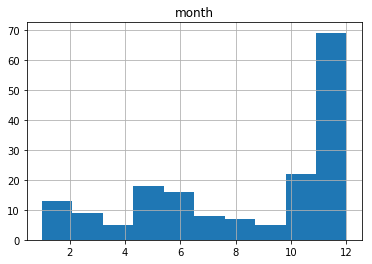

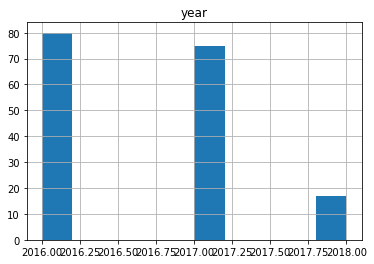

In [10]:
fname = 'shsher@uw.edu.ics'
cal_data = open_gcal(fname)
cal_df = cal_to_df(cal_data)

In [15]:
cal_df['count']=1

In [18]:
cal_group = cal_df.groupby(['event_name'],as_index=False)['count'].agg(sum)

In [19]:
cal_group

,event_name,count
0,550,1
1,550 Policy Class,2
2,561 - Peer projects review assignment - Review...,1
3,561 Project discussion,1
4,561 final project sync up,1
5,573 DS1,1
6,576 SNA,1
7,580 PPt,1
8,Amazon Alexa: Skill Development Workshops - Se...,3
9,Amazon SDE Internship Overview - 7/5,1
